In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scanimagetiffio import SITiffIO
#import utils_image from the parent folder
import sys
sys.path.append("..")
from utils_image import UnrotateCropFrame, RegFrame, findFOV

In [3]:
#load fullZ 
fullZ = np.load('/home/zilong/Desktop/2D2P/Data/183_28072023/DP/fullZ.npy')

In [4]:
datafolder = '/home/zilong/Desktop/2D2P/Data/183_31072023/'
# read the rotation center from the circlecenter txt file
circlecenterfilename = datafolder+"DP_exp/circlecenter.txt"
with open(circlecenterfilename, "r") as f:
    # read the last row
    last_line = f.readlines()[-1]
    # assign the x and y coordinates to self.rotx and self.roty
    rotx = float(last_line.split()[0])
    roty = float(last_line.split()[1])
print("Rotation center is at ({}, {})".format(rotx, roty))

Rotation center is at (281.0, 254.0)


In [5]:
#load tiff on next day
tiff = datafolder+'31072023_00001.tif'
relog = datafolder+'REdata_20230731_160225.00001.txt'
S = SITiffIO()
S.open_tiff_file(tiff, "r")
S.open_rotary_file(relog)
#extract the last self.numFrames frames from the tiff file
tailArray, tailAng = S.tail(500)   
# unrotate each frame in the tiff file with the detected rotation center
unrotFrames  = UnrotateCropFrame(tailArray, tailAng, rotCenter=[rotx, roty])
#perform image registraion
meanRegImg, _ = RegFrame(unrotFrames)

Loading rotary encoder file: /home/zilong/Desktop/2D2P/Data/183_31072023/REdata_20230731_160225.00001.txt
Calculating rotations and times from rotary encoder data...
Finished calculating rotations and times.
The rotary encoder file has 34604 timestamps in it.
Counted 9000 frames
Reference frame, 8.03 sec.
Registered 200/500 in 3.69s
Registered 400/500 in 7.10s
Registered 500/500 in 8.60s


(-0.5, 325.5, 325.5, -0.5)

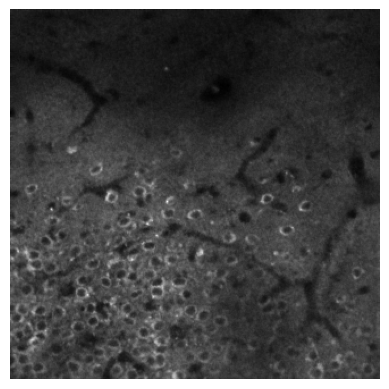

In [6]:
plt.imshow(meanRegImg, cmap='gray')
plt.axis('off')

In [24]:
ymax, xmax, zcorr = findFOV(fullZ, meanRegImg, maxrotangle=30)

1 planes, 0/61 frames, 0.29 sec.
11 planes, 0/61 frames, 1.77 sec.
21 planes, 0/61 frames, 3.26 sec.
31 planes, 0/61 frames, 4.74 sec.
41 planes, 0/61 frames, 6.27 sec.
51 planes, 0/61 frames, 7.90 sec.
61 planes, 0/61 frames, 9.32 sec.
70 planes, 0/61 frames, 10.57 sec.


In [28]:
#apply a 2D gaussian filter to zcorr, ymax, xmax using scipy.ndimage
zcorr_gs = gaussian_filter(zcorr.copy(), 2)
ymax_gs = gaussian_filter(ymax.copy(), 2)
xmax_gs = gaussian_filter(xmax.copy(), 2)

#find the max value in zcorr_gs and extract the corresponding ymax_gs and xmax_gs
maxvalue = np.max(zcorr_gs)
maxindex = np.where(zcorr_gs == maxvalue)   


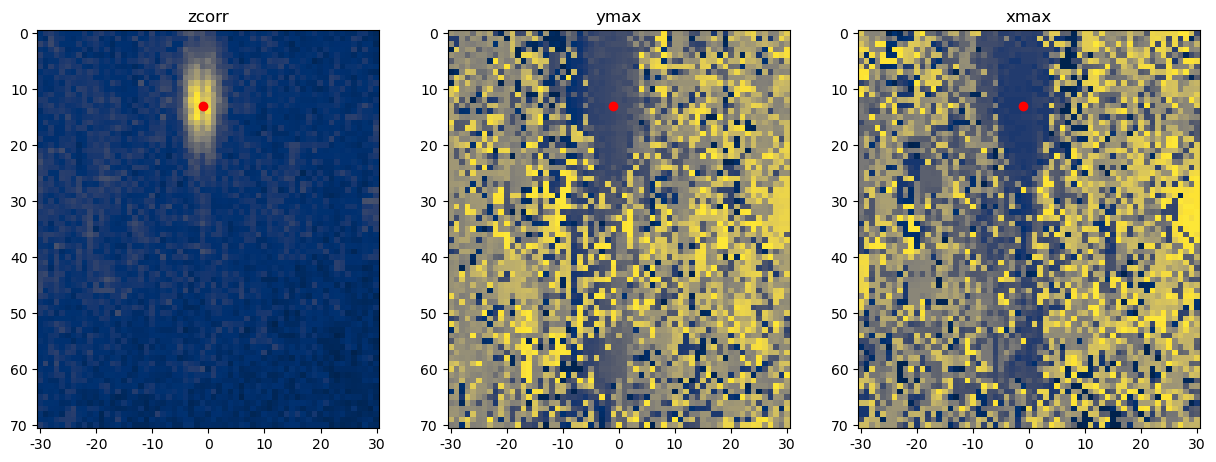

In [29]:
#show zcorr ymax and xmax in subplots
cmap = 'cividis'
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(zcorr, cmap=cmap)
plt.xticks(np.arange(0, 61, 10), np.arange(-30, 31, 10))
plt.title('zcorr')
#mark the max value with a red dot
plt.plot(maxindex[1][0], maxindex[0][0], 'ro')

plt.subplot(1,3,2)
plt.imshow(ymax, cmap=cmap)
plt.xticks(np.arange(0, 61, 10), np.arange(-30, 31, 10))
plt.title('ymax')
#mark the max value with a red dot
plt.plot(maxindex[1][0], maxindex[0][0], 'ro')

plt.subplot(1,3,3)
plt.imshow(xmax, cmap=cmap)
plt.xticks(np.arange(0, 61, 10), np.arange(-30, 31, 10))
plt.title('xmax')
#mark the max value with a red dot
plt.plot(maxindex[1][0], maxindex[0][0], 'ro')
plt.show()

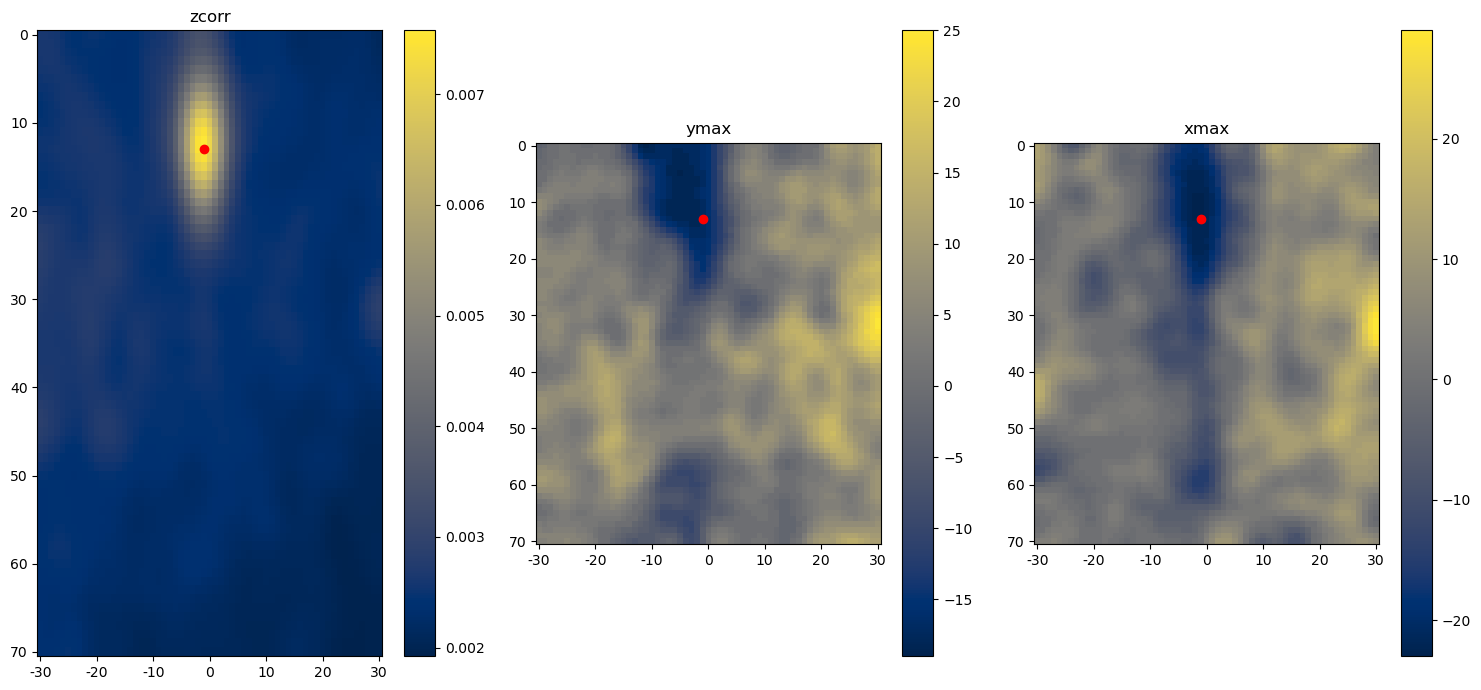

In [33]:
#show zcorr ymax and xmax in subplots
cmap = 'cividis'
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.imshow(zcorr_gs, cmap=cmap, aspect='auto')
plt.xticks(np.arange(0, 61, 10), np.arange(-30, 31, 10))
plt.colorbar()
plt.title('zcorr')
#mark the max value with a red dot
plt.plot(maxindex[1][0], maxindex[0][0], 'ro')

plt.subplot(1,3,2)
plt.imshow(ymax_gs, cmap=cmap, aspect='auto')
plt.xticks(np.arange(0, 61, 10), np.arange(-30, 31, 10))
plt.colorbar()
plt.title('ymax')
#mark the max value with a red dot
plt.plot(maxindex[1][0], maxindex[0][0], 'ro')


plt.subplot(1,3,3)
plt.imshow(xmax_gs, cmap=cmap, aspect='auto')
plt.xticks(np.arange(0, 61, 10), np.arange(-30, 31, 10))
plt.colorbar()
plt.title('xmax')
#mark the max value with a red dot
plt.plot(maxindex[1][0], maxindex[0][0], 'ro')

plt.tight_layout()

plt.show()

In [23]:
ymax_gs.shape

(1,)